In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('WWWusage.csv', names=['index', 'time', 'value'], header=0)
print(f"Total samples: {len(df)}")
df = df[['time', 'value']]
print(df.head())

Total samples: 100
   time  value
0     1     88
1     2     84
2     3     85
3     4     85
4     5     84


In [25]:
df.info()
# keep only one index
# df.index = df.index.droplevel(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    100 non-null    int64
 1   value   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   time    100 non-null    int64
 1   value   100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


<Axes: >

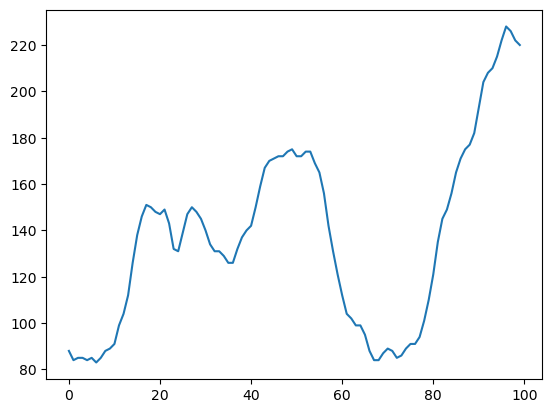

In [27]:
# plot the data with time on the x-axis
# line plot
df['value'].plot()

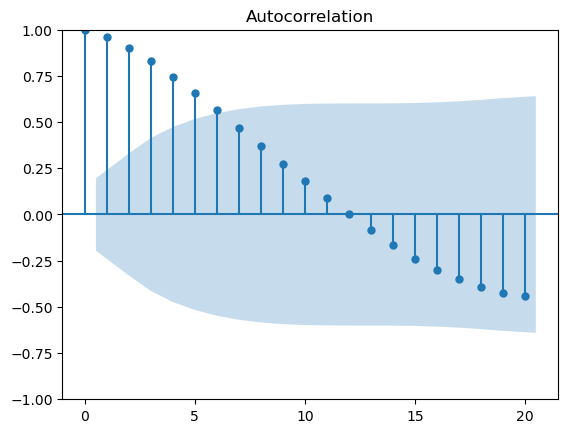

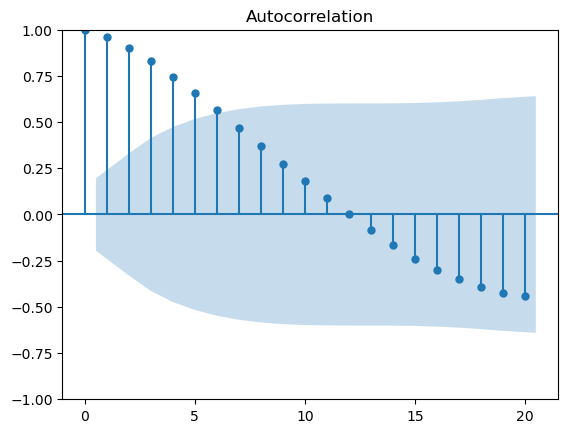

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.value)

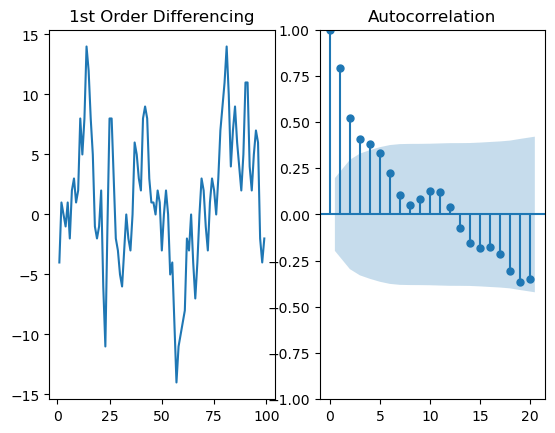

In [29]:
# first order differencing
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().dropna(), ax=ax2)
plt.show()

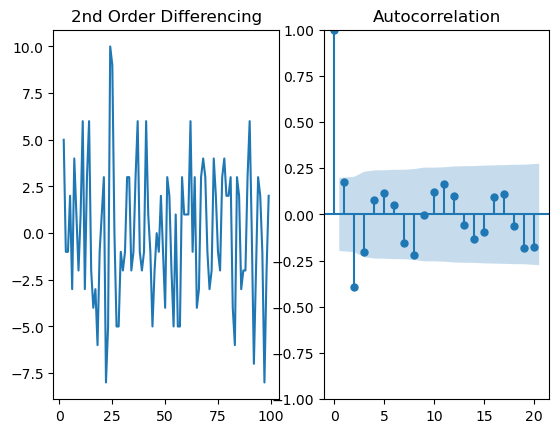

In [30]:
# second order differencing
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [31]:
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.12441935447109487
p-value:  0.07026846015272728
p-value:  2.843428755547158e-17


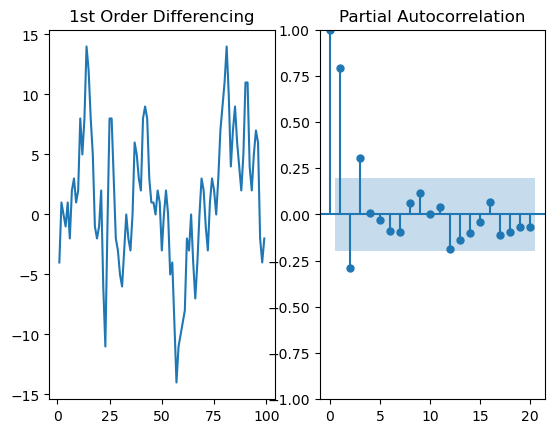

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
# partial autocorrelation
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

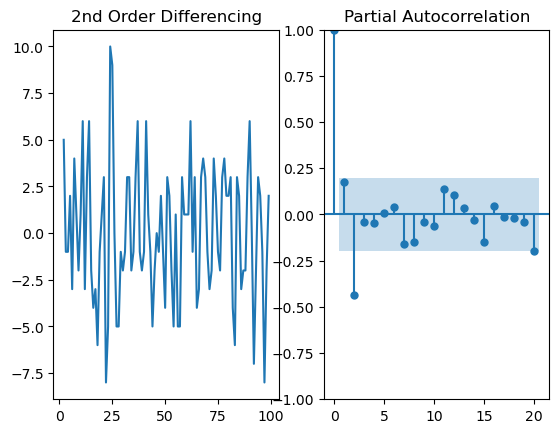

In [33]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df.value, order=(1, 1, 2))
model = arima_model.fit()
# Calculate the standard deviation of the innovations
std_dev_innovations = model.resid.std()
print(f'Standard Deviation of Innovations: {std_dev_innovations}')
print(model.summary())

Standard Deviation of Innovations: 9.317527834982602
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Sat, 04 May 2024   AIC                            516.253
Time:                        11:56:41   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786

In [35]:
# # change d to 2
# arima_model = ARIMA(df.value, order=(1, 2, 2))
# model = arima_model.fit()
# # Calculate the standard deviation of the innovations
# std_dev_innovations = model.resid.std()
# print(f'Standard Deviation of Innovations: {std_dev_innovations}')
# print(model.summary())

In [36]:
# # change q to 3
# arima_model = ARIMA(df.value, order=(1, 1, 3))
# model = arima_model.fit()
# # Calculate the standard deviation of the innovations
# std_dev_innovations = model.resid.std()
# print(f'Standard Deviation of Innovations: {std_dev_innovations}')
# print(model.summary())

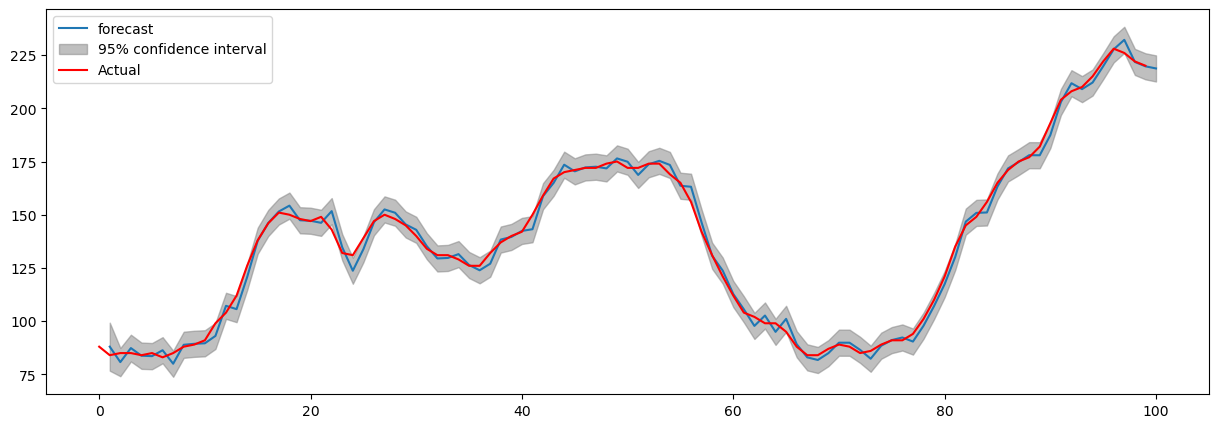

In [37]:
from statsmodels.graphics.tsaplots import plot_predict
# plot the predictions
fig, ax = plt.subplots(figsize=(15, 5))
plot_predict(model, start=1, end=len(df), ax=ax)
ax.plot(df['value'], color='red', label='Actual')
plt.legend()
plt.show()

In [38]:
# take the first 80 samples
arima_model = ARIMA(df.value[:80], order=(1, 1, 2))
model = arima_model.fit()
# Calculate the standard deviation of the innovations
std_dev_innovations = model.resid.std()
print(f'Standard Deviation of Innovations: {std_dev_innovations}')
print(model.summary())

Standard Deviation of Innovations: 10.320975015139219
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   80
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -203.020
Date:                Sat, 04 May 2024   AIC                            414.041
Time:                        11:56:42   BIC                            423.518
Sample:                             0   HQIC                           417.838
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5732      0.186      3.078      0.002       0.208       0.938
ma.L1          0.5533      0.207      2.668      0.008       0.147       0.96

In [39]:
# take the first 80 samples, change d to 2
arima_model = ARIMA(df.value[:80], order=(1, 2, 2))
model = arima_model.fit()
# Calculate the standard deviation of the innovations
std_dev_innovations = model.resid.std()
print(f'Standard Deviation of Innovations: {std_dev_innovations}')
print(model.summary())

Standard Deviation of Innovations: 11.710871081646532
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   80
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -201.756
Date:                Sat, 04 May 2024   AIC                            411.511
Time:                        11:56:43   BIC                            420.938
Sample:                             0   HQIC                           415.285
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6477      0.113      5.719      0.000       0.426       0.870
ma.L1         -0.5207      7.719     -0.067      0.946     -15.649      14.60

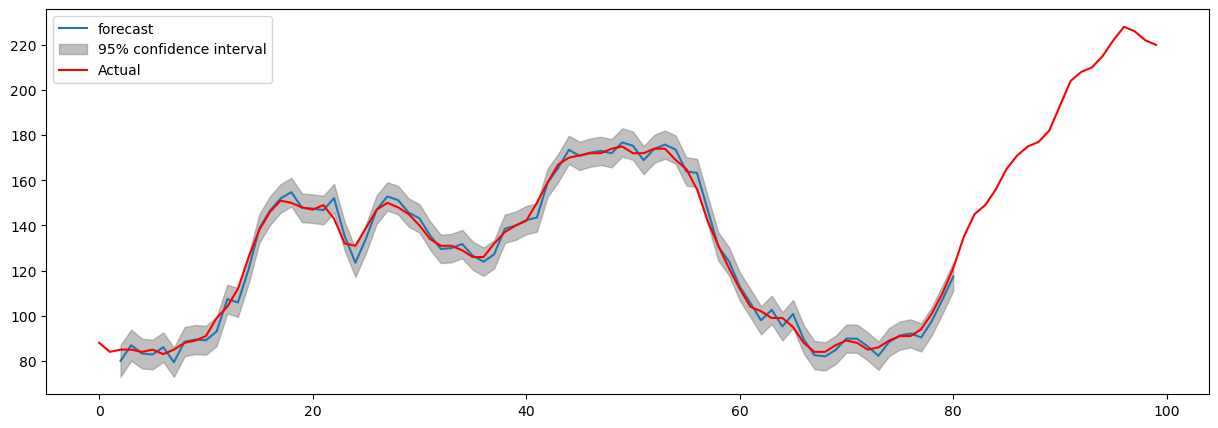

In [40]:
# plot the predictions
fig, ax = plt.subplots(figsize=(15, 5))
plot_predict(model, start=2, end=80, ax=ax)
ax.plot(df['value'], color='red', label='Actual')
plt.legend()
plt.show()

In [41]:
import numpy as np
# forecast 20 steps ahead
y_pred = pd.Series(model.forecast(20).iloc[0], index=df.value[80:].index)
y_ture = df.value[80:]

print(np.array(y_pred).astype(np.uint8))
print(np.array(y_ture))

[117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117 117
 117 117]
[121 135 145 149 156 165 171 175 177 182 193 204 208 210 215 222 228 226
 222 220]


In [42]:
import pprint

y_pred = pd.Series(model.forecast(20).iloc[0], index=df.value[80:].index)
y_ture = df.value[80:]

mape = np.mean(np.abs(y_pred - y_ture)/np.abs(y_ture)) #mean absolute percentage error
mae = np.mean(np.abs(y_pred - y_ture)) #mean absolute error
mpe = np.mean((y_pred - y_ture)/y_ture) #mean percentage error
rmse = np.mean((y_pred - y_ture)**2)**.5 #root mean squared error
corr = np.corrcoef(y_pred, y_ture)[0,1] #correlation coefficient

mins = np.amin(np.hstack([np.array(y_pred)[:,None], np.array(y_pred)[:,None]]), axis=1)
maxs = np.amax(np.hstack([np.array(y_pred)[:,None], np.array(y_pred)[:,None]]), axis=1)
minmax = 1 - np.mean(mins/maxs) #minmax

pprint.pprint({
    'mape': mape,
    'mae': mae,
    'mpe': mpe,
    'rmse': rmse,
    'corr': corr,
    'minmax': minmax
})

{'corr': -3.5046823030474523e-16,
 'mae': 68.91702000596868,
 'mape': 0.34833805215816394,
 'minmax': 0.0,
 'mpe': -0.34833805215816394,
 'rmse': 76.16965042917744}


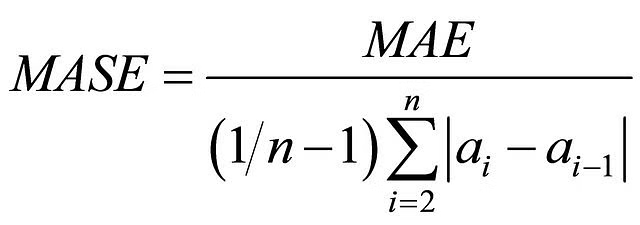

In [43]:
# MASE (Mean Absolute Scaled Error) is another way to measure the accuracy of a model
n = np.array(df[:80]).shape[0]
d = np.abs(np.diff(df[:80].value)).sum()/(n-1)

errors = np.abs(y_pred - y_ture)
print(errors.mean()/d)

16.908212982830825
